<h1>Перевірка даних на нормальність за допомогою критерію Шапіра-Уілка</h1>

<h3>КП №4</h3>
<h3>виконав студент групи БС-81
Тарабара Сергій</h3>

1. Сгенерувати набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.

In [41]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

In [42]:
data = pd.DataFrame(
{
    "data_Normal1": np.random.normal(4,size = 20),
    "data_Normal2": np.random.normal(2,size = 20),
    "data_Normal3": np.random.normal(3,size = 20),
    "data_Gumbel": np.random.gumbel(loc=1, scale=10, size = 20),
    "data_Geometric": np.random.geometric(p=0.2, size=20),
    "data_Exponential": np.random.exponential(5, 20)
})
data

,data_Normal1,data_Normal2,data_Normal3,data_Gumbel,data_Geometric,data_Exponential
0,3.411750,2.596290,2.087056,-9.663318,3,1.675831
1,4.710318,2.625635,3.696329,-7.182564,8,2.991564
2,3.056044,2.036441,2.781574,9.712635,4,5.020016
3,5.165523,0.918475,2.491580,21.288118,2,6.029524
4,3.766542,2.894869,4.240165,5.060497,10,1.332760
5,3.134287,0.770551,2.471412,4.042087,5,10.271724
6,4.581653,0.771914,5.456707,17.052822,19,24.899497
7,5.442735,1.309516,3.913339,13.570353,1,4.782913
8,4.750372,2.501120,3.819798,13.928692,7,1.044650
9,4.258754,2.643588,2.120964,24.976567,5,4.814427


2. Створити функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних.

In [43]:
#Відсортуємо дані
data = data.apply(lambda x: x.sort_values().values)
data

,data_Normal1,data_Normal2,data_Normal3,data_Gumbel,data_Geometric,data_Exponential
0,2.441562,-0.113926,1.274720,-9.663318,1,0.149804
1,2.929375,0.462489,2.087056,-7.182564,1,0.738119
2,3.056044,0.653680,2.120964,-3.874996,1,0.814917
3,3.134287,0.770551,2.405418,-1.955711,2,1.044650
4,3.208903,0.771914,2.471412,-1.805805,2,1.332760
5,3.411750,0.918475,2.491580,-0.575215,2,1.675831
6,3.596839,1.309516,2.544035,4.042087,2,2.285808
7,3.633486,1.718137,2.781574,4.826490,3,2.991564
8,3.766542,1.763483,2.932000,5.060497,4,3.042932
9,4.065397,1.849681,3.177640,9.712635,5,3.483775


In [44]:
#S^2:

size = data.shape[0] 

def calc_squared_S(array, value):
    return sum([(array[i]-value)**2 
                for i in range(size)]) 

values = {key: np.mean(data[key]) for key in data}
squared_S = {key: calc_squared_S(data[key], values[key])
                 for key in data}


In [45]:
#values:
a=[0.4734, 0.3111, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140]
#b:
def calc_B(array):
    return sum([a[i]*(array[(size-1)-i]-array[i])
                for i in range(size//2)])

b = {key: calc_B(data[key]) for key in data}

In [46]:
#W:
def calc_W(b, squared_S):
    return b**2/squared_S

W = {key: calc_W(b[key], squared_S[key]) for key in data}

W_theoretic = sts.shapiro(data['data_Exponential'])
W_theoretic

(0.7263622283935547, 8.321239147335291e-05)

3. Сгенерувати пусту таблицю, в якій кількість рядків - це кількість змінних+1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution.

In [47]:
table=pd.DataFrame(columns=["Variable","Statistics","Distribution"]) 
table

,Variable,Statistics,Distribution


4. Занести в стовпчик Variable назви змінних.

In [48]:
table['Variable']=data.keys()
table

,Variable,Statistics,Distribution
0,data_Normal1,NaN,NaN
1,data_Normal2,NaN,NaN
2,data_Normal3,NaN,NaN
3,data_Gumbel,NaN,NaN
4,data_Geometric,NaN,NaN
5,data_Exponential,NaN,NaN


5. Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".

In [49]:
table["Distribution"] = [('normal ' if 'normal' in key else 'non-normal ')+
                          str(W[key])
                          for key in table["Variable"]]
table

,Variable,Statistics,Distribution
0,data_Normal1,NaN,non-normal 0.9462548043160883
1,data_Normal2,NaN,non-normal 0.9474378056320221
2,data_Normal3,NaN,non-normal 0.9452840108440124
3,data_Gumbel,NaN,non-normal 0.9473835540073375
4,data_Geometric,NaN,non-normal 0.801900598803477
5,data_Exponential,NaN,non-normal 0.7191139556546704


6. Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].

#Так як змінних, що розподілені за нормальним законом немає, певно можна не розраховувати..

7. Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].

In [50]:
for i in range (table.shape[0]):
    key = table["Variable"][i]
    if 'normal' not in key:
        table["Statistics"][i] = f'{data[key].median()} [{data[key].quantile(0.25)}; {data[key].quantile(0.75)}]'

table

,Variable,Statistics,Distribution
0,data_Normal1,4.106256470168574 [3.361038035129812; 4.751487...,non-normal 0.9462548043160883
1,data_Normal2,1.9430610411428924 [0.8818347961042927; 2.6109...,non-normal 0.9474378056320221
2,data_Normal3,3.276539490485665 [2.4865381621843703; 3.88194...,non-normal 0.9452840108440124
3,data_Gumbel,10.874145657004998 [-0.8828621021059238; 18.11...,non-normal 0.9473835540073375
4,data_Geometric,5.0 [2.0; 7.0],non-normal 0.801900598803477
5,data_Exponential,4.050042567546041 [1.5900632105675452; 5.27239...,non-normal 0.7191139556546704


8. Зберегти таблицю у пдф форматі

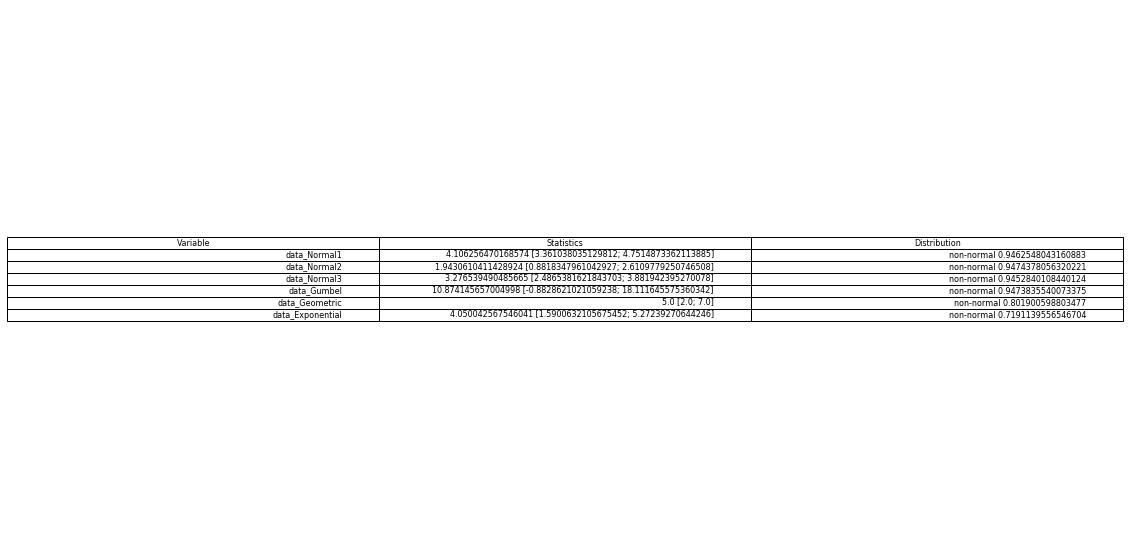

In [51]:
from matplotlib.backends.backend_pdf import PdfPages 

fig, ax = plt.subplots(figsize=(20,10))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=table.values,colLabels=table.columns,loc='center')

pp = PdfPages("table.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()